## Cargar librerías

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import factorial
import scipy.stats as st
from scipy.stats import ttest_ind, levene
from matplotlib import pyplot as plt

## Revisar base de datos con su respectivo resumen y decripción de los datos/registros

In [2]:
games = pd.read_csv("/datasets/games.csv")

In [3]:
display(games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
display(games.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [6]:
games.isnull().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [7]:
games.duplicated().sum()

0

### Lower Case nombres de columnas

In [8]:
games.columns = games.columns.str.lower()
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Modificación de valores

#### Modificación valores nulos de "genre" y "name"

In [9]:
games[games["genre"].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
games = games.dropna(subset=['genre'])

In [11]:
games[games["genre"].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Modificación valores nulos de "user_score" y "critic_score".

In [12]:
games[games["user_score"].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
games[games["critic_score"].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Modificación valores nulos de "year_of_release"

In [14]:
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
games = games.dropna(subset=['year_of_release'])

In [16]:
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Modificación valores nulos de "user_score"

In [17]:
games["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
games["user_score"] = games["user_score"].replace('tbd', np.nan)

In [19]:
games["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [20]:
games["user_score"] = games["user_score"].fillna(0)
games["critic_score"] = games["critic_score"].fillna(0)

In [21]:
games["critic_score"].unique()

array([76.,  0., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [22]:
games["user_score"].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

### Modificación de tipos de datos

#### Modificación de tipo de datos de "year_of_release"

In [23]:
games.loc[:, "year_of_release"] = games["year_of_release"].astype(int)

#### Modificación de tipo de datos de "user_score"

In [24]:
games["user_score"] = games["user_score"].astype(float)

In [25]:
games.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

##### ¿Por qué modificar los valores ausentes de está manera?
1. "Genre" & "name"

Inicialmente, al encontrar que son dos registros que se encuentran con valores ausentes, la idea de eliminarlos es la más acertada ya que son dos registros los cuales, no afectaran en los resultados de mi estudio, pero podrían generar incidencias directas en los procesos para los resultados ya que son atípicos y no caben en una categorización real.

2. "user_score" & "critic_score"

Se modifican los valores nulos por "0", con el fin de poder llevar a cabo procesos matemáticos.

3. "year_of_release"

Las fechas ausentes no son categorizables, lo que significa que al momento de iterar usando la columna de fechas, se obtendran errores.

##### ¿Por qué razón se podría considerar que los valores están ausentes?
1. "Genre" & "name"

Existen dos registros ausentes. Estos dos registros ausentes podrían ser ocasionados por la productora del juego (qué no está especificado pero por deducción, pudo haber sido una juego creado por empresa indie ya que sus ventas son demasiado bajas) o por ser una juego tipo BETA, lo que genera que los datos sean faltantes 

2. "user_score" & "critic_score"

Captación de información leve por falta de motivación de los usuarios y poco impacto en la industria de los juegos, lo que generó una baja participación en la calificación del videojuego. Cabe aclarar qué, algunos juegos muestran una característica en las ventas: Bajas participación de ventas en el mercado. Sin personas que tengan la oportunidad y/o experiencia de juego, no hay posibilidad de ser calificados.

3. "year_of_release"

En algunos casos, aunque el juego lleva la fecha en su nombre, no poseen el año de lanzamiento. Esto se puede dar por una posible captación de la información de quienes llevaron a cabo está base de datos. En algunos casos, al igual que para "score", se puede apreciar que el juego no tiene ventas significativas

##### "user_score": "TBD" → "NaN"

Se modifica "TBD" por "NaN" con el fin de poder modificar el tipo de dato en cual se encuentra está columna. Ya que es muy probable que este dato no sea determinado, es preferible emplearlo como NaN ya que no contiene ningún dato real, solo una "marca".

## Análisis de la base de datos "Games"

### Juegos por año

In [26]:
games_by_year = games["year_of_release"].value_counts().sort_index()

games_by_year_percentage = (games_by_year / games_by_year.sum()) * 100

year_summary = pd.DataFrame({
    "games_released": games_by_year,
    "percentage": games_by_year_percentage.round(2)
})

print(year_summary)

      games_released  percentage
1980               9        0.05
1981              46        0.28
1982              36        0.22
1983              17        0.10
1984              14        0.09
1985              14        0.09
1986              21        0.13
1987              16        0.10
1988              15        0.09
1989              17        0.10
1990              16        0.10
1991              41        0.25
1992              43        0.26
1993              60        0.36
1994             121        0.74
1995             219        1.33
1996             263        1.60
1997             289        1.76
1998             379        2.30
1999             338        2.06
2000             350        2.13
2001             482        2.93
2002             829        5.04
2003             775        4.71
2004             762        4.63
2005             939        5.71
2006            1006        6.12
2007            1197        7.28
2008            1427        8.68
2009      

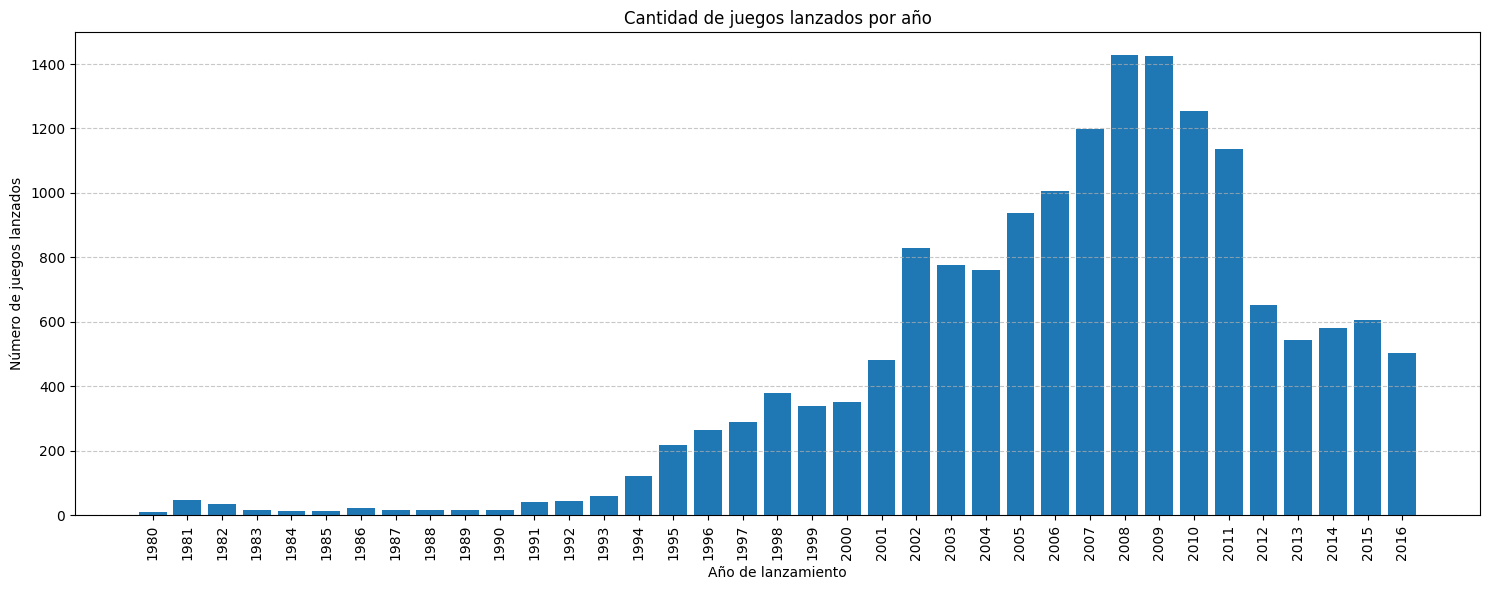

In [27]:
plt.figure(figsize=(15, 6))
plt.bar(year_summary.index.astype(str), year_summary["games_released"])
plt.xticks(rotation=90)
plt.xlabel("Año de lanzamiento")
plt.ylabel("Número de juegos lanzados")
plt.title("Cantidad de juegos lanzados por año")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Conclusiones:

Se puede apreciar qué existe un aumento bastante considerable en los juegos lanzados a partir del 1990 hasta 2011. Como una posible especulación (Sin hacer una revisión general de los datos), esto puede ocurrir por la creciente generación de consolas para dichos años, pues la técnología mejoró exponencialmente para estos años.

¿Cómo se puede llegar a esta conclusión? 

Las PlayStation, los XBOX y las máquina producidas por Nintendo, surgen durante este periodo de tiempo.

### Longevidad de las plataformas

In [28]:
games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]
platform_sales = games.groupby("platform")["total_sales"].sum().sort_values(ascending=False)

top_platforms = platform_sales.index.tolist()

sales_by_year_platform = games[games["platform"].isin(top_platforms)].groupby(
    ["year_of_release", "platform"]
)["total_sales"].sum().unstack(fill_value=0)

platform_lifespan = games[games["platform"].isin(top_platforms)].groupby("platform")["year_of_release"].agg(["min", "max"])
platform_lifespan["lifespan_years"] = platform_lifespan["max"] - platform_lifespan["min"]

print(platform_lifespan)

           min   max  lifespan_years
platform                            
2600      1980  1989               9
3DO       1994  1995               1
3DS       2011  2016               5
DC        1998  2008              10
DS        1985  2013              28
GB        1988  2001              13
GBA       2000  2007               7
GC        2001  2007               6
GEN       1990  1994               4
GG        1992  1992               0
N64       1996  2002               6
NES       1983  1994              11
NG        1993  1996               3
PC        1985  2016              31
PCFX      1996  1996               0
PS        1994  2003               9
PS2       2000  2011              11
PS3       2006  2016              10
PS4       2013  2016               3
PSP       2004  2015              11
PSV       2011  2016               5
SAT       1994  1999               5
SCD       1993  1994               1
SNES      1990  1999               9
TG16      1995  1995               0
W

In [29]:
##### TOP 10 PLATAFORMAS ####

games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]
platform_sales = games.groupby("platform")["total_sales"].sum().sort_values(ascending=False)

top_platforms = platform_sales.head(10).index.tolist()

sales_by_year_platform = games[games["platform"].isin(top_platforms)].groupby(
    ["year_of_release", "platform"]
)["total_sales"].sum().unstack(fill_value=0)

platform_lifespan = games[games["platform"].isin(top_platforms)].groupby("platform")["year_of_release"].agg(["min", "max"])
platform_lifespan["lifespan_years"] = platform_lifespan["max"] - platform_lifespan["min"]

print(platform_lifespan)

           min   max  lifespan_years
platform                            
3DS       2011  2016               5
DS        1985  2013              28
GBA       2000  2007               7
PS        1994  2003               9
PS2       2000  2011              11
PS3       2006  2016              10
PS4       2013  2016               3
PSP       2004  2015              11
Wii       2006  2016              10
X360      2005  2016              11


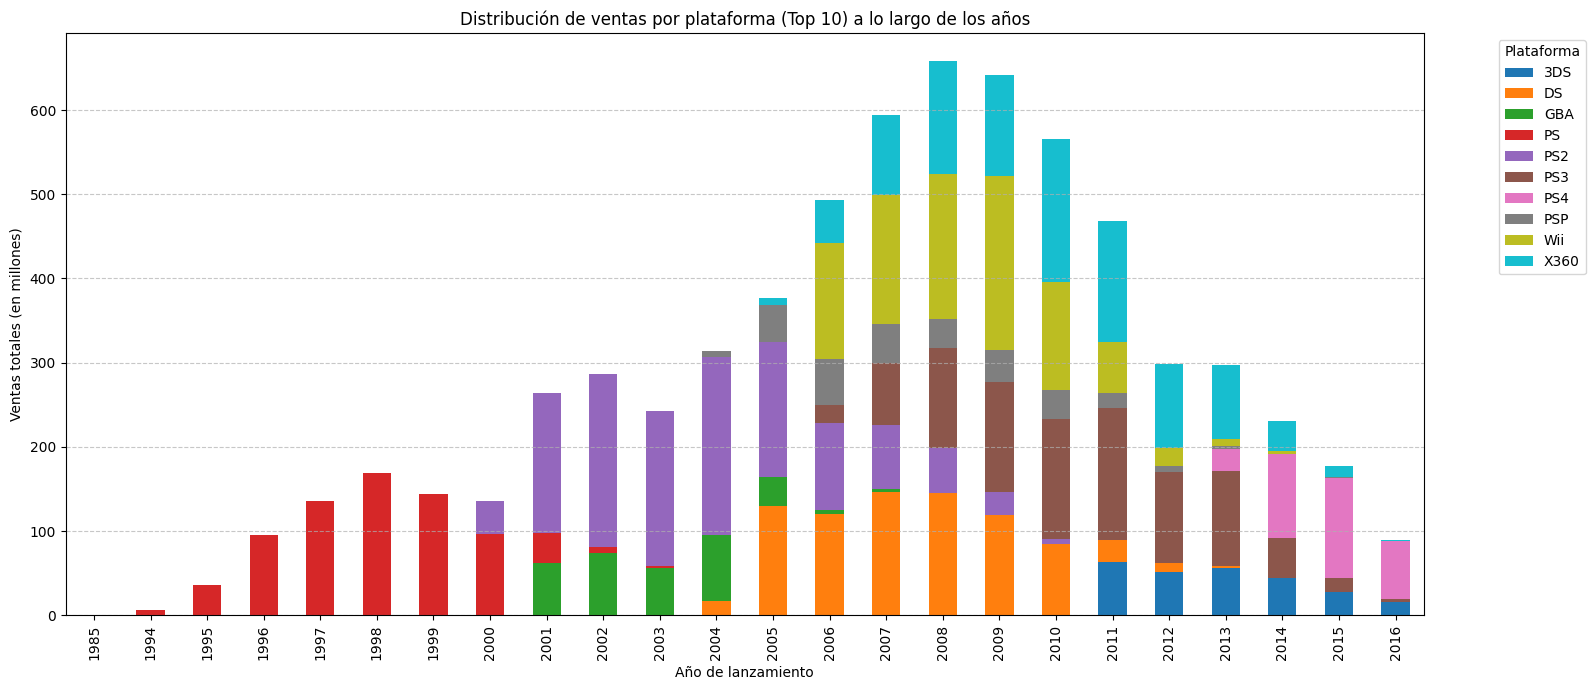

In [30]:
sales_by_year_platform.plot(kind="bar", stacked=True, figsize=(16, 7))

plt.title("Distribución de ventas por plataforma (Top 10) a lo largo de los años")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas totales (en millones)")
plt.legend(title="Plataforma", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Conclusiones:

- Algunas plataformas como Wii, PS2 y XBOX 360 presentan picos de ventas bastante fuertes durante 2006 y 2011, después de estos periodos, estás consolas desaparecen del mercado. → Diferencias de 6 a 10 años de popularidad antes de convertirse en máquinas obsoletas.

- Nintendo DS presenta una longevidad mucho mayor que otras plataformas (Cerca de 28 años) aunque cabe resaltar que tiene un comportamiento mucho mayor entre el 2005 y 2010.

- Los computadores (PC en el DF), presentan una longevidad sostenida en toda la base de datos. Desde 1985 hasta 2016 (Fecha máxima del df).

### Datos qué, al ser modelados, generarían data para el 2017

##### Para tener en cuenta para generar datos del 2017:

- Se necesitan datos representantivos que contengan un comportamiento de mercado bastante fuerte.
- Alta captación de datos con respecto a los años contenidos en el DF.
- Importante tener en cuenta los puntos anteriores para tener presente las consolas qué, aún siendo 2016, se encuentren vigentes para considerarse relevantes en el mercado.


##### Consideraciones para establecer los periodos de tiempo a modelar:

1. Si observamos las gráficas anteriores, los datos antes del 2000, no presentan un volumen de datos realmente relevante, pues son poco significativos por una baja presencia de plataformas y juegos.
2. El mercado empieza a diversificarse a partir del 2001.
3. Se debe tener presente el "reemplazo" de consolas. Un ejemplo de esto, es claramente notorio para la marca SONY con su representativa PlayStation. En el mercado se ha contado con 4 versiones diferentes de PlayStation (PS1, 2, 3 & 4) las cuales han afectado directamente las ventas de sus antecesores.
4. Las plataformas más significativas en el mercado (PS3, XBOX 360, Nintedo Wii y Nintendo DS) tiene un auge en el mercado entre el 2006 y 2015.

##### Respuesta y conclusión:
Se sugiere emplear un periodo de tiempo desde el 2010 hasta el 2016.

1. Este periodo tiene presente el ciclo de las plataformas más representativas en el mercado (Nintendo Wii, XBOX 360, PS3, PS4, etc...)
2. Excluye consolas y juegos con poca presencia de datos o comportamientos que no son realmente significativos.
3. Sostiene un contexto evolutivo de consolas antecesoras de plataformas más "modernas" con respecto al 2017 como lo es la PS4, XBOX One y computador (PC).

### ¿Qué plataformas son líderes en ventas?
#### (Datos irrelevantes excluídos por su calidad, cantidad y capacidad de alcance)

In [31]:
# Filtrado de datos usando exclusivamente periodos relevantes
recent_data = games[(games["year_of_release"] >= 2010) & (games["year_of_release"] <= 2016)].copy()

In [32]:
# Ventas totales por plataforma y año
recent_data["total_sales"] = (
    recent_data["na_sales"] +
    recent_data["eu_sales"] +
    recent_data["jp_sales"] +
    recent_data["other_sales"]
)

sales_by_platform_year = recent_data.groupby(["year_of_release", "platform"])["total_sales"].sum().unstack(fill_value=0)

display(sales_by_platform_year)

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2010,0.00,85.02,24.28,5.64,142.17,0.00,35.04,0.00,127.95,0.00,170.03,0.00
2011,63.20,26.18,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00
2012,51.36,11.01,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,0.00,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,0.00,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [33]:
# Diferencia de ventas año a año
platform_growth = sales_by_platform_year.diff().fillna(0)

display(platform_growth)

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2010,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2011,63.20,-58.84,10.75,-5.19,14.61,0.00,-17.22,4.63,-68.30,0.00,-26.19,0.00
2012,-11.84,-15.17,-11.81,-0.45,-49.42,0.00,-10.13,11.56,-37.94,17.56,-44.10,0.00
2013,5.21,-9.47,-10.84,0.00,5.89,25.99,-4.55,-5.60,-13.12,4.09,-11.16,18.96
2014,-12.81,-1.54,0.90,0.00,-65.49,74.01,-2.90,1.31,-4.84,0.38,-53.84,35.11
2015,-15.98,0.00,-4.76,0.00,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016,-12.64,0.00,-3.27,0.00,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


##### Conclusiones:

1. *Plataformas líderes (2010 - 2016):*  
   - PS3, XBOX 360 y Nintendo Wii presentan una dominancia en el mercado para el inicio de la década.  
   - PS4 y XBOX One empiezan a destacar en el mercado entre 2013 y 2014.  
   - Los computadores (PC) presentan una estabilidad en el mercado sin picos significativos.

2. *Plataformas crecientes:*  
   - XBOX One y PS4 presentan un claro crecimiento en ventas desde el año en que aparecen hasta el 2016.

3. *Plataformas en decadencia:* 
   - PS3, XBOX 360 y Nintendo Wii presentan una caída en las ventas hasta llegar a desaparecer.

4. *Ciclo de vida:* 
   - Las consolas suelen tener un ciclo de 6 a 8 años de vida activa en el mercado. Este ciclo de vida muestra un pico de ventas, una estabilización y, por último, un declive en las ventas hasta llegar casi a su desaparición.



### ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?

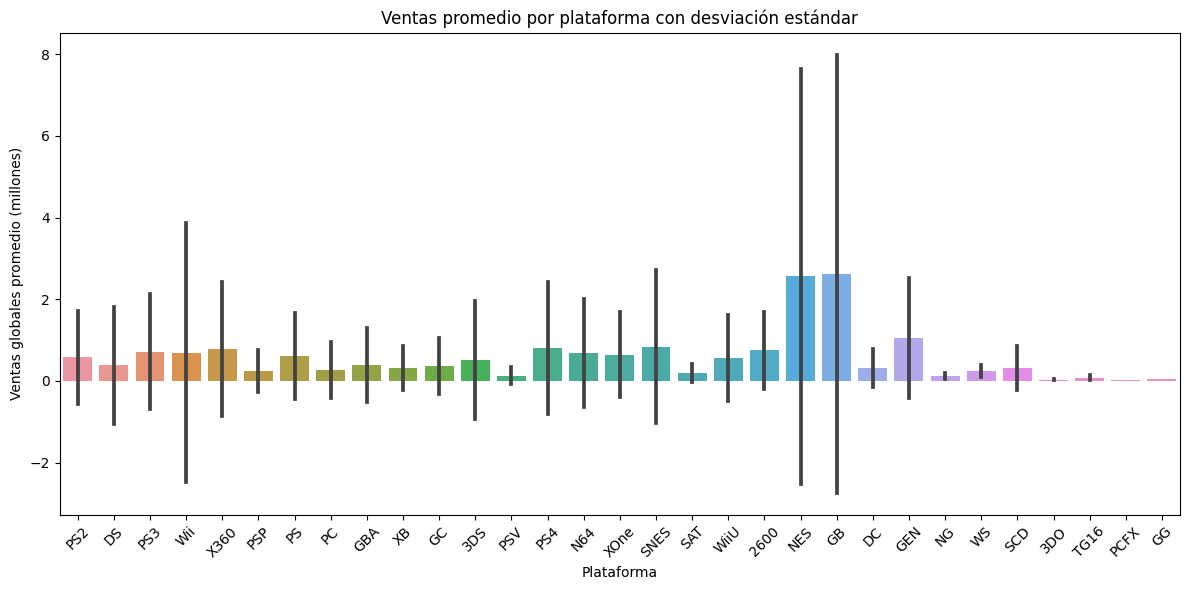

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(data=games, x="platform", y="total_sales", estimator=np.mean, ci="sd", order=games["platform"].value_counts().index)
plt.title("Ventas promedio por plataforma con desviación estándar")
plt.ylabel("Ventas globales promedio (millones)")
plt.xlabel("Plataforma")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **¿Son significativas las diferencias en las ventas por plataforma?**:

Sí, las diferencias en las ventas globales entre plataformas son significativas. 

El diagrama de caja muestra que algunas plataformas presentan ventas medianas y rangos más altos, lo que indica que sus juegos tienden a vender mejor de forma más consistente. 

Plataformas como PSV, PSP y DS muestran ventas mucho más bajas, tanto en promedio como en distribución general.


##### **¿Qué sucede con las ventas promedio en varias plataformas?**:

- XBOX 360 y PS4 son las plataformas líderes en el mercado por contar con una media cercana de 0.8M de unidades x juego, seguidas por PS 3 y XBOX One.
- PSP, Nintendo DS y PSVita muestran medias más bajas (Entre los 0.12 - 0.24M x juego), lo que se traduce como una menor rentabilidad promedio.
- Computador (PC) se muestra constante.

##### Conclusiones:

1. Las plataformas PS4, XBOX 360, PS3, XBOX One combinan buenas ventas promedio con menor dispersión, lo que las hace atractivas y predecibles.

2. Plataformas con muchos outliers, como Wii o WiiU, pueden tener grandes éxitos, pero también alta variabilidad.

3. Las plataformas con ventas bajas y alta dispersión deberían ser consideradas con cautela al momento de modelar el rendimiento de juegos futuros.

###  Reseñas de usuarios y reseñas de profesionales como factores de afectación en ventas en Sony PS4

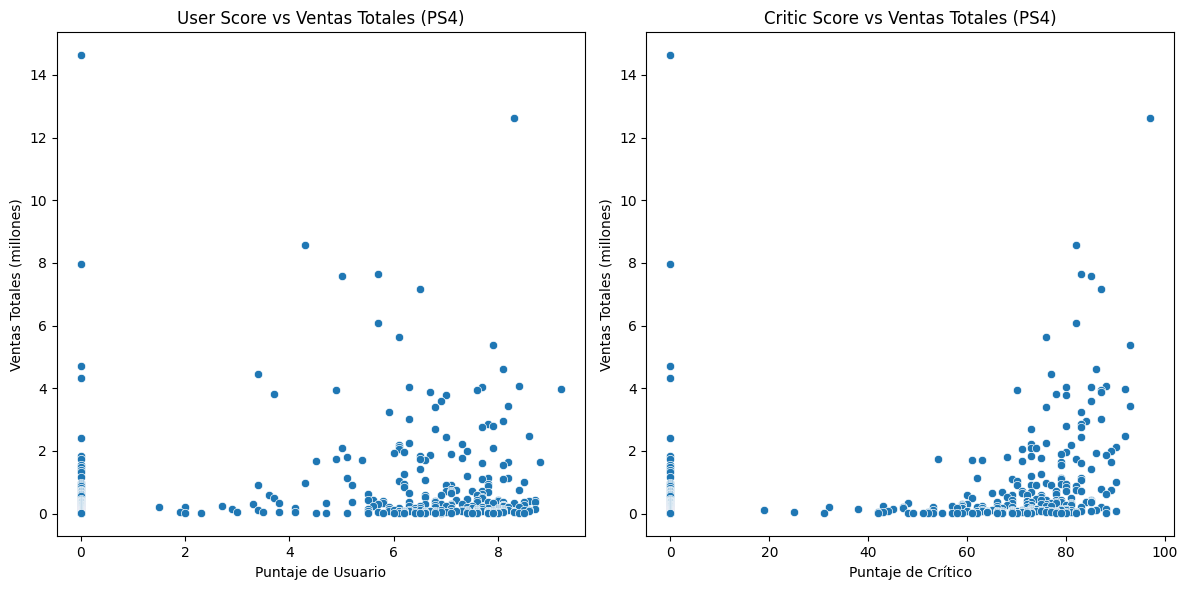

In [72]:
platform = "PS4"

# Filtrado de datos para PS4 entre 2010 y 2016
platform_data = games[(games["platform"] == platform) & (games["year_of_release"] >= 2010) & (games["year_of_release"] <= 2016)].copy()

# Gráfico de dispersión: user_score vs total_sales
plt.figure(figsize=(12, 6))

# Subplot 1: Reseñas de usuarios
plt.subplot(1, 2, 1)
sns.scatterplot(data=platform_data, x="user_score", y="total_sales")
plt.title(f"User Score vs Ventas Totales ({platform})")
plt.xlabel("Puntaje de Usuario")
plt.ylabel("Ventas Totales (millones)")

# Subplot 2: Reseñas de críticos
plt.subplot(1, 2, 2)
sns.scatterplot(data=platform_data, x="critic_score", y="total_sales")
plt.title(f"Critic Score vs Ventas Totales ({platform})")
plt.xlabel("Puntaje de Crítico")
plt.ylabel("Ventas Totales (millones)")

plt.tight_layout()
plt.show()

In [74]:
# Calcular correlaciones
platform_data[["user_score", "critic_score", "total_sales"]].corr()
correlations = platform_data[["user_score", "critic_score", "total_sales"]].corr()
correlations.loc[["user_score", "critic_score"], "total_sales"]

user_score      0.113116
critic_score    0.227550
Name: total_sales, dtype: float64

##### Observaciones:

*User Score Vs Ventas:* Relación débil y positiva.

*Critic Score Vs Ventas:* Relación débil pero más significativa con respecto a User Score

##### Conclusiones:

Como se pudo apreciar en el gráfico de dispersión y en las correlaciones entre las críticas Vs las ventas, la Sony PS4 presenta una correlación ligeramente significativa en las críticas de los "expertos" con respecto a las críticas de los usuarios aunque, en general, ninguna métrica es un factor influyente en el éxito de ventas de los juegos.

En resumen, las ventas de los juegos es independiente de las críticas, tanto de los usuarios, como de los "expertos".

###  Comparación de ventas de los mismos juegos de PS4 en otras plataformas.

In [ ]:
# Filtrado de datos con respecto a los juegos de PS4
ps4_games = games[(games["platform"] == "PS4") & (games["year_of_release"] >= 2010) & (games["year_of_release"] <= 2016)]

# Nombre de los juegos de PS4
ps4_game_names = ps4_games["name"].unique()

# Titulos de PS4 que fueron vendidos en otras plataformas sin contener PS4 en la tabla de salida:
multi_platform_games = games[(games["name"].isin(ps4_game_names))] 

# Agrupación por nombre y plataforma, luego, sumar ventas
comparison = multi_platform_games.groupby(["name", "platform"])["total_sales"].sum().reset_index()

display(comparison)

In [ ]:
# Usar los juegos con mayores ventas acumuladas para un gráfico más claro
top_multi_games = comparison.groupby("name")["total_sales"].sum().sort_values(ascending=False).head(10).index.tolist()
top_comparison = comparison[comparison["name"].isin(top_multi_games)]

# Crear gráfico de barras
plt.figure(figsize=(18, 8))
sns.barplot(data=top_comparison, x="name", y="total_sales", hue="platform")
plt.title("Ventas globales en otras plataformas de los juegos populares de PS4")
plt.xlabel("Juego")
plt.ylabel("Ventas totales (millones)")
plt.xticks(rotation=25, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Plataforma", loc="upper left")
plt.tight_layout()
plt.show()

##### Observaciones:
Observaciones del los 3 juegos más vendidos partiendo de títulos contenidos en la Sony PS4 que son vendidos en otras plataformas

***Grand Theft Auto V (GTA V)***

Se puede apreciar un gran volumen de ventas para la PS3 (+20M de copias vendidas), seguido por el XBOX 360 (+16M de copias vendidas), XBOX One en tercer lugar (+5M de copias vendidas) y por último, el computador (PC) (+1M de copias vendidas).

***Call of Duty: Ghosts***

Ventas elevadas en XBOX One (+10M de copias vendidas) y PS3 (cerda de 3M de copias vendidas). Ventas bastante bajas para PC y Wii U.

***Minecraft***

Mayores ventas en XBOX (+9M de copias vendidas), PS3 (+5M de copias vendidas) y XBOX One (Cerca de 3M de copias vendidas). Plataformas como PSVita y Wii U, presentan ventas bastante bajas.

##### Conclusiones:

- Bastantes juegos de Sony PS4, también tuvieron una buena acogida en otras plataformas como lo son la XBOX 360 y la PS3.
- La PS4 no muestra tener ventas mayores de sus antecesores.
- El éxito en ventas de los juegos también está dado por la cantidad de usuarios pertenecientes a otras plataformas. Algunos juegos tienen mayor participación de ventas para la PS4 y algunos títulos que se vendieron para PS4, fueron mayormente vendidos en otras plataformas.

###  Distribución general de los juegos por género.

In [ ]:
# Agrupar por género, luego  sumar las ventas totales
genre_sales = games.groupby("genre")["total_sales"].sum().sort_values(ascending=False).reset_index()

# Promedio de ventas por juego → evaluar rentabilidad individual
genre_avg_sales = games.groupby("genre")["total_sales"].mean().sort_values(ascending=False).reset_index()

# Merge métricas en un solo DF
genre_summary = pd.merge(genre_sales, genre_avg_sales, on="genre", suffixes=("_total", "_avg"))

# Renombrar columnas
genre_summary.columns = ["genre", "total_sales", "avg_sales_per_game"]

display(genre_summary)


#####  **¿Qué se puede decir de los géneros más rentables?** :

Los géneros más rentables por juego son:

    - Género: Platform (como Super Mario o Donkey Kong)

    - Género: Shooter (como Call of Duty, Halo)

    - Género: Role-Playing (como Pokémon, Final Fantasy)

Se puede interpretar que, aunque los géneros pueden tener menos lanzamientos que otros, cada juego tiende a generar un gran volúmen de ventas.

##### **¿Qué sucede con las ventas promedio en varias plataformas?**:

- *Altas ventas totales:*

Los géneros Action y Sports, presentan mayores ventas globales. Sin embargo, su promedio por juego es más bajo, lo que sugiere una gran cantidad de títulos con desempeño moderado.

En resumen, son géneros populares y masivos, pero con una alta competencia interna.

- *Ventas bajas:*

Aunque no aparecen en el top de la tabla, géneros como Puzzle, Strategy o Adventure suelen tener tanto ventas totales como promedio más bajos.

En resumen, esto refleja un mercado más de nicho, con menor retorno comercial por juego.


##### Conclusiones:

- Los Shooters, Platform y Rol-Playing son los géneros más rentables a escala individual.
- Action y Sports dominan en volumen total de ventas.
- Los géneros con bajas ventas como Puzzle o Strategy, tienen audiencias más reducidas y podrían no ser viables comercialmente sin una propuesta de valor.

## Análisis de datos por Usuarios para cada Región
### Regiones NA, UE, JP &  Other

###  Distribución de ventas según la región

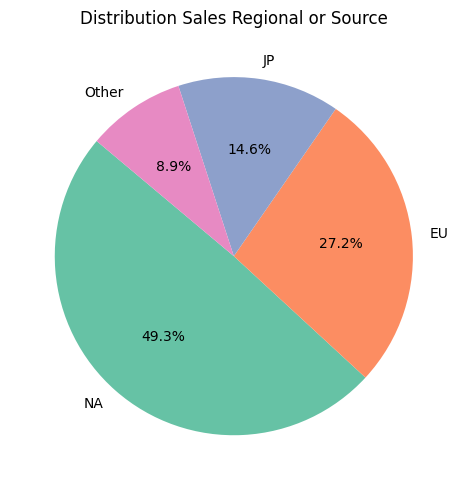

In [37]:
sales_total = {
    'NA': games['na_sales'].sum(),
    'EU': games['eu_sales'].sum(),
    'JP': games['jp_sales'].sum(),
    'Other': games['other_sales'].sum()
}

colors = plt.get_cmap('Set2').colors[:4]

plt.figure(figsize=(5,5))
plt.pie(
    sales_total.values(),
    labels=sales_total.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title('Distribution Sales Regional or Source')
plt.ylabel('')
plt.tight_layout()
plt.show()

###  Las cinco plataformas principales.

In [38]:
# Calcular ventas totales x plataforma y región
region_platform_sales = games.groupby("platform")[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum()

# Top 5 de plataformas x región
top_platforms_by_region = {
    region: region_platform_sales[region].sort_values(ascending=False).head(5)
    for region in region_platform_sales.columns
}

# Calcular la cuota de mercado (%)
market_share_by_region = {
    region: (sales / sales.sum() * 100).round(2)
    for region, sales in top_platforms_by_region.items()
}

# Merge resultados en un solo DF
market_share_df = pd.DataFrame(market_share_by_region)

display(market_share_df)

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
3DS,NaN,NaN,15.03,NaN
DS,15.68,NaN,26.14,10.80
PS,NaN,15.18,20.88,NaN
PS2,23.62,23.78,20.54,34.84
PS3,16.08,23.39,NaN,24.62
SNES,NaN,NaN,17.41,NaN
Wii,20.07,18.47,NaN,14.21
X360,24.56,19.18,NaN,15.53


<Figure size 1200x600 with 0 Axes>

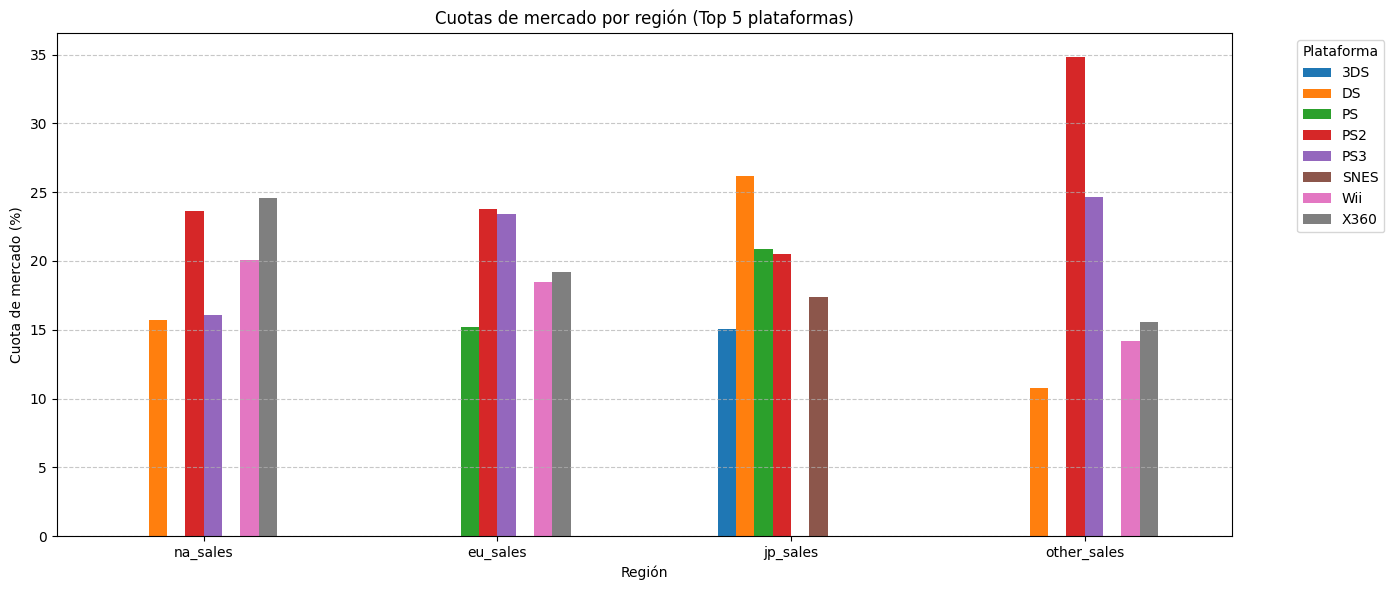

In [39]:
# Transponer el DataFrame para tener regiones en el eje X
plot_df = market_share_df.T

# Crear gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
plot_df.plot(kind="bar", figsize=(14, 6))

plt.title("Cuotas de mercado por región (Top 5 plataformas)")
plt.ylabel("Cuota de mercado (%)")
plt.xlabel("Región")
plt.xticks(rotation=0)
plt.legend(title="Plataforma", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Conclusiones:

- Japón (JP) muestra una favorabilidad de ventas en Nintendo y Sony PlayStation (Marcas propias de dicho país), por ende, la presencia de Microsoft XBOX (marca americana) es practicamente inexistente.
- Norteamérica (NA) y Europa (EU) presentan un mercado equilibrado entre Sony PlayStation y Microsoft XBOX.
- Es importante tener presente que la PlayStation 2 es la única consola que muestra una presencia en todas las regiones logrando posicionarse como un éxito global a nivel mundial.

###  Los cinco géneros principales.

In [40]:
# Agrupación las ventas por género y región
region_genre_sales = games.groupby("genre")[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum()

# Top 5 de géneros x región
top_genres_by_region = {
    region: region_genre_sales[region].sort_values(ascending=False).head(5)
    for region in region_genre_sales.columns
}

# Calcular la cuota de mercado (%)
market_share_genres = {
    region: (sales / sales.sum() * 100).round(2)
    for region, sales in top_genres_by_region.items()
}

# Merge resultados en un DF
genre_market_share_df = pd.DataFrame(market_share_genres)

display(genre_market_share_df)

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,29.13,31.12,18.07,32.17
Misc,13.48,12.83,12.08,12.91
Platform,15.00,NaN,14.75,NaN
Racing,NaN,14.28,NaN,13.33
Role-Playing,NaN,NaN,39.88,NaN
Shooter,19.74,19.16,NaN,18.24
Sports,22.65,22.62,15.23,23.34


<Figure size 1200x600 with 0 Axes>

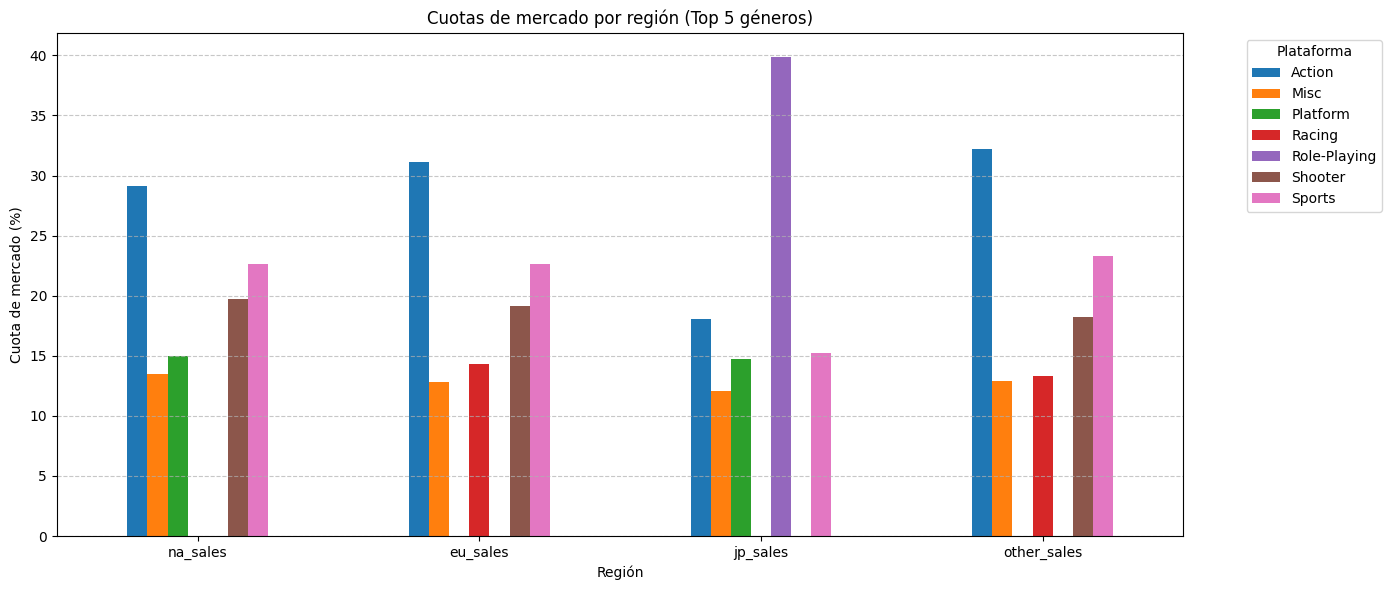

In [41]:
# Transponer el DataFrame para tener regiones en el eje X
plot_df = genre_market_share_df.T

# Crear gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
plot_df.plot(kind="bar", figsize=(14, 6))

plt.title("Cuotas de mercado por región (Top 5 géneros)")
plt.ylabel("Cuota de mercado (%)")
plt.xlabel("Región")
plt.xticks(rotation=0)
plt.legend(title="Plataforma", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Conclusiones:

- Action es el único género dominante en tres regiones.
- Role-Playing es el género dominante en Japón (JP).
- Racing es un género bastante atractivo en Europa (EU) y otras regiones, pero no muestra una alta participación en Japón (JP) ni Norteamérica (NA).
- Platform mantiene presencia en Japón (NA) y Norteamérica (NA), pero es inexistente en Europa (EU) y Other.
- Como conclusión externa a los datos, el comportamiento a la hora de escoger un género en algunas regiones, posiblemente es dado por gustos distintos o menor relevancia de franquicias tradicionales.

### ¿La clasificació de ESRB afectan las ventas a nivel regional?

In [42]:
# Agrupar ventas por clasificación ESRB & región
esrb_region_sales = games.groupby("rating")[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum()

# Calcular % de participación x región dentro de cada rating
esrb_region_share = esrb_region_sales.div(esrb_region_sales.sum(axis=0), axis=1).round(4) * 100

display(esrb_region_share)

,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
AO,0.04,0.03,0.00,0.01
E,40.90,39.32,43.61,36.59
E10+,11.09,10.24,8.86,11.37
EC,0.05,0.01,0.00,0.02
K-A,0.08,0.02,0.32,0.00
M,23.84,26.82,14.01,27.82
RP,0.00,0.00,0.00,0.00
T,24.00,23.56,33.20,24.18


<Figure size 1200x600 with 0 Axes>

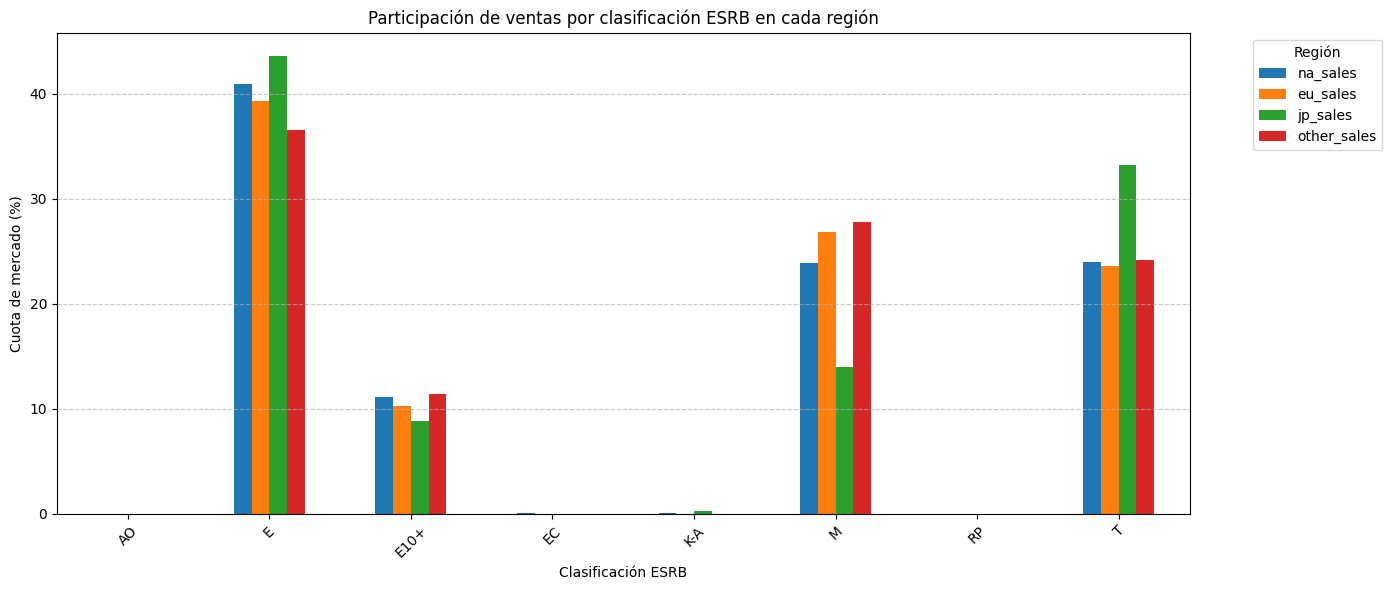

In [43]:
plt.figure(figsize=(12, 6))
esrb_region_share.plot(kind="bar", figsize=(14, 6))

plt.title("Participación de ventas por clasificación ESRB en cada región")
plt.xlabel("Clasificación ESRB")
plt.ylabel("Cuota de mercado (%)")
plt.xticks(rotation=45)
plt.legend(title="Región", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### **Para tener en cuenta:**

- **EC (Early Childhood)**: Adecuado para niños pequeños (3+ años).
- **E (Everyone)**: Para todos los públicos (todas las edades).
- **E10+ (Everyone 10+)**: Para mayores de 10 años.
- **T (Teen)**: Para adolescentes (13+ años).
- **M (Mature)**: Para mayores de 17 años.
- **AO (Adults Only)**: Para adultos solamente (18+ años).
- **RP (Rating Pending)**: La clasificación aún está pendiente de asignación.
- **K-A (Kids to Adults)**: Clasificación antigua, reemplazada por "E" (Everyone).

##### Conclusiones:

E (Todos), E10+ (Todos +10), T (Adolescentes), M (Maduro) y AO (Solo para adultos)

Es importante entender qué, la clasificación ESRB **SI** tienen una afectación directa en las ventas por región. Esto se puede determinar con respecta a:
- El tipo de juegos que se lanzan para públicos específicos.
- Preferencias culturales: por ejemplo, Japón favorece títulos con menor contenido violento o adulto.
- En NA y Europa, las clasificaciones como E y M tienden a dominar, lo cual sugiere mayor aceptación de productos familiares y también de contenido maduro.

## Pruebas de hipótesis

###### alpha = 0.05 para todos los casos

###  *Hipótesis nula (H0):* 
#### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

###  *Hipótesis alternativa (H1):* 
#### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [70]:
alpha = 0.05

# Filtrado de datos de las plataformas XBOX One & Computador (PC)
xone_scores = games[(games["platform"] == "XOne") & (games["user_score"] > 0)]["user_score"]
pc_scores = games[(games["platform"] == "PC") & (games["user_score"] > 0)]["user_score"]

# Prueba de Levene para evaluar igualdad de varianzas
levene_stat, levene_p = levene(xone_scores, pc_scores)
equal_var = True if levene_p > alpha else False
decision_levene = "Se acepta igualdad de varianzas" if equal_var else "Se rechaza igualdad de varianzas"

# Prueba t
t_stat, p_value = ttest_ind(xone_scores, pc_scores, equal_var=False)
decision_ttest = "Se acepta la hipótesis nula (H₀)" if p_value > alpha else "Se rechaza la hipótesis nula (H₀)"

# Resultados
{
    "media_XOne": round(xone_scores.mean(), 3),
    "media_PC": round(pc_scores.mean(), 3),
    "t_statistic": round(t_stat, 3),
    "p_value": round(p_value, 5),
    "alpha": alpha,
    "decisión_ttest": decision_ttest,
    "levene_statistic": round(levene_stat, 3),
    "levene_p_value": round(levene_p, 4),
    "decisión_levene": decision_levene,
    "equal_var_usado_en_ttest": equal_var
}

{'media_XOne': 6.521,
 'media_PC': 7.066,
 't_statistic': -4.671,
 'p_value': 0.0,
 'alpha': 0.05,
 'decisión_ttest': 'Se rechaza la hipótesis nula (H₀)',
 'levene_statistic': 1.171,
 'levene_p_value': 0.2796,
 'decisión_levene': 'Se acepta igualdad de varianzas',
 'equal_var_usado_en_ttest': True}

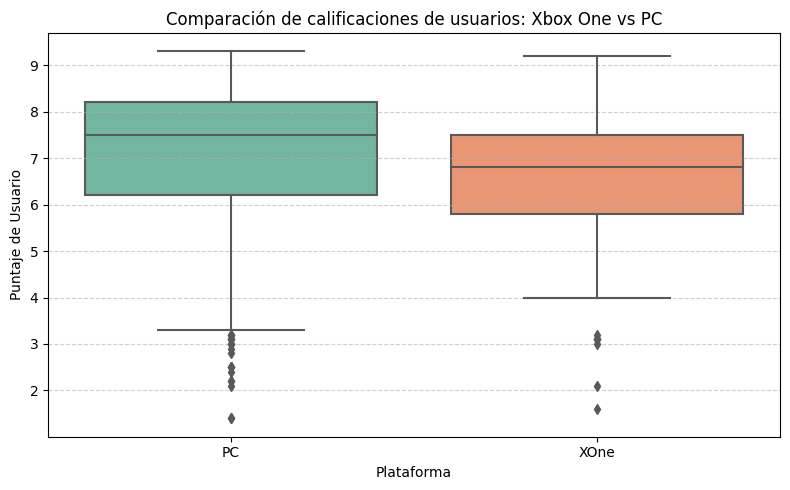

In [52]:
plot_data = games[(games["platform"].isin(["XOne", "PC"])) & (games["user_score"] > 0)][["platform", "user_score"]]

plt.figure(figsize=(8, 5))
sns.boxplot(data=plot_data, x="platform", y="user_score", palette="Set2")
plt.title("Comparación de calificaciones de usuarios: Xbox One vs PC")
plt.xlabel("Plataforma")
plt.ylabel("Puntaje de Usuario")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### Conclusiones:

Cómo se puede observar, el p_value es menor que alpha, por ende, **se rechaza la hipotesis nula**.

En otras palabras, se puede afirmar que las calificaciones promedio de los usuarios de XBOX Ones y Computador (PC), son significativamente diferentes... NO son iguales

###  *Hipótesis nula (H0):* 
#### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales..

###  *Hipótesis alternativa (H1):* 
#### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes diferentes.

In [69]:
alpha = 0.05
decision = "Se acepta la hipótesis nula (H₀)" if p_value > alpha else "Se rechaza la hipótesis nula (H₀)"

# Filtrado de datos para los géneros Acción y Deportes 
action_scores = games[(games["genre"] == "Action") & (games["user_score"] > 0)]["user_score"]
sports_scores = games[(games["genre"] == "Sports") & (games["user_score"] > 0)]["user_score"]

# Prueba de Levene para evaluar igualdad de varianzas
levene_stat, levene_p = levene(action_scores, sports_scores)
equal_var = True if levene_p > alpha else False
decision_levene = "Se acepta igualdad de varianzas" if equal_var else "Se rechaza igualdad de varianzas"

# Prueba t para muestras independientes
t_stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=False)

decision_ttest = "Se acepta la hipótesis nula (H₀)" if p_value > alpha else "Se rechaza la hipótesis nula (H₀)"

# Resultados
{
    "media_Acción": round(action_scores.mean(), 3),
    "media_Deportes": round(sports_scores.mean(), 3),
    "t_statistic": round(t_stat, 3),
    "p_value": round(p_value, 4),
    "alpha": alpha,
    "decisión_ttest": decision_ttest,
    "levene_statistic": round(levene_stat, 3),
    "levene_p_value": round(levene_p, 4),
    "decisión_levene": decision_levene,
    "equal_var_usado_en_ttest": equal_var
}

{'media_Acción': 7.058,
 'media_Deportes': 6.951,
 't_statistic': 1.789,
 'p_value': 0.0737,
 'alpha': 0.05,
 'decisión_ttest': 'Se acepta la hipótesis nula (H₀)',
 'levene_statistic': 15.43,
 'levene_p_value': 0.0001,
 'decisión_levene': 'Se rechaza igualdad de varianzas',
 'equal_var_usado_en_ttest': False}

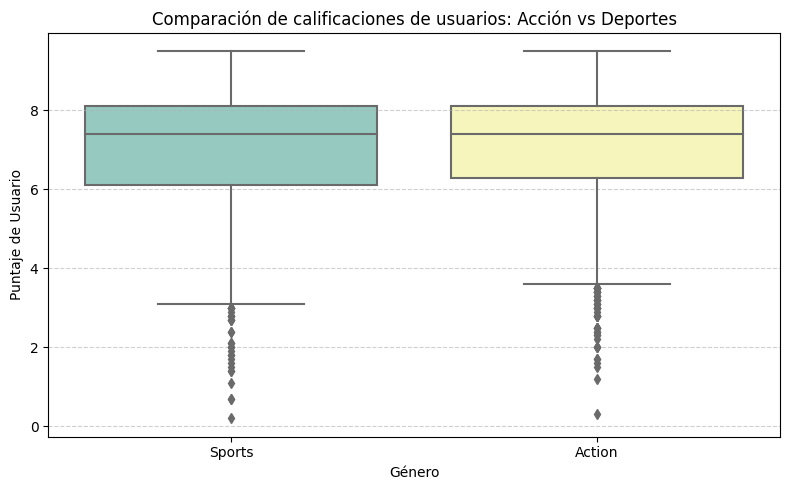

In [47]:
genre_plot_data = games[(games["genre"].isin(["Action", "Sports"])) & (games["user_score"] > 0)][["genre", "user_score"]]

plt.figure(figsize=(8, 5))
sns.boxplot(data=genre_plot_data, x="genre", y="user_score", palette="Set3")
plt.title("Comparación de calificaciones de usuarios: Acción vs Deportes")
plt.xlabel("Género")
plt.ylabel("Puntaje de Usuario")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### Conclusiones:

Cómo se puede observar, el p_value es mayor que alpha, por ende, **se acepta la hipotesis nula**.

En otras palabras, se puede afirmar que no hay evidencia estadística suficiente para afirmar que las calificaciones promedio entre los géneros Acción y Deportes sean diferentes.

#### ¿Cómo se formularon las hipótesis nula y alternativas para ambos casos?:

Básicamente, el enunciado lo sugiere. Se está revisando el promedio de las calificaciones para 2 segmentos diferentes:
1) Consolas (Plataformas)
2) Géneros de videojuegos.

Es importante resaltar que se pretende encontrar las variaciones promedio entre dos segmentos categóricos, para delimitar si existe alguna similitud entre ambos.

#### ¿Qué criterio se utilizó para probar las hipótesis?:

Se emplea la prueba de T-Student ya que se están trabajando con muestras independientes con varianzas desiguales.

#### ¿Por qué?:

1. Para ambos casos de estudio, se están comparando las medias de las calificaciones de dos grupos completamente independientes.
   - Plataformas: XBOX One Vs Computador (PC)
   - Géneros: Acción Vs Deportes.
2. Se debe tener en cuenta qué las calificaciones de los usuarios son variable continuas.
3. Cada observación pertenece a solo un grupo. En otras palabras, no son datos repetidos o pareados.
4. Los grupos pueden obtener varianzas distintas.

#### Conclusión:

La prueba de T-Student es una prueba que se emplea, principalmente, para comprar las medias de dos grupos independientes, pero relacionados (misma plataforma, mismo género), con varianzas desiguales.

## Conclusión general

#### Mercado y juegos

- Mayor parte de los juegos, llegaron al mercado entre los años 2000 y 2016.
- La Sony PlayStation 2, PlayStation 3, PlayStation 4 y Microsoft XBOX 360 son consolas (plataformas) con un alto volumen de juegos, así mismo, una gran cantidad de ventas de los mismos.
- Sony y Microsoft tienen una alta presencia global.

#### Plataformas y su ciclo de vida

- En promedio, las plataformas muestran un ciclo muy especifico (Aproximadamente 6 a 8 años) desde su aparición en el mercado.
- Los computadores (PC) se sostiene en el mercado como una plataforma constante y estable a lo largo de las fechas de estudio.
- Sony PlayStation 2 fue un exito internacional tras mostrar ventas en todas las regiones.

#### Géneros

- Acción (Action) → Género mayormente vendido en volumen total, pero baja rentabilidad individual.
- Plataformas (Platform), disparos (Shooters) y juegos de rol (Role-Playing) → Géneros con una mayor rentabilidad individual.
- Lógica (Puzzle) y estrategia (Strategy) muestran un nicho específico, por ende, limitado.

#### Preferencias regionales

- Japón (JP) → En consolas, muestran preferencias por sus productos nacionales creados por Sony y Nintendo, además, el género "Role-Playing" es predominante sobre todos los géneros.
- Europa (EU) y Norteamérica (NA) → En consolas, existe un "equilibrio" de ventas en las consolas creadas por Microsoft y Sony. "Action" y "Shooters" se posicionan como los generos más apetecidos.

#### Preferencias globales

Partiendo de la clasificación ESRB:

- Clasificación E (Everyone) tiene alta presencia en el mercado global.
- Clasificaciones AO (Adults Only) & EC (Early Childhood) no tienen un impacto significativo en el mercado global.
 
**→ Esta clasificación tiene afectaciones directas en las ventas de los juegos ←**

## En resumen:

La evolución de las plataformas y los juegos permiten entender que existe una alta rotación de las consolas y los juegos netamente por la obsolescencia programada y percibida.

Una vez sale una consola "predecesora", existe una pequeña escala de tiempo donde los fabricantes siguen fabricando juegos o versiones compatibles para las consolas "antecesoras" o puede ocurrir lo contrario, se genera una versión exclusiva para una consola específica.
Esto permite entender que no todos los juegos persisten con el paso del tiempo (con remasterizaciones o nuevas versiones) y esto se puede explicar mendiante ventas y criticas de expertos y usuarios.

También es importante tener en cuenta qué, aunque las consolas cambién y los juegos persistan o no, los géneros se mantienen con el paso del tiempo según las regiones.

Aunque el mercado de los juegos se ajustan conforme las consolas salen al mercado, siempre existirán nichos exigentes y específicos para sostener y/o mantener "vivos" algunas consolas y géneros.